# Description of the project

* This project involves a script to import tables from scientific papers, thesis or any .pdf file.
* I used my [M.Sc. Thesis article](https://www.sciencedirect.com/science/article/abs/pii/S0024493720301900) and [Sciuba's 2020 PhD thesis](https://corpus.ulaval.ca/jspui/browse?type=author&order=ASC&rpp=20&authority=24f39a93-12d1-414c-847b-74b0ab5a0f2e) for testing and the output results are good enough to automatize a database building process using Python.
* This script is suited to be used in Google Colab, but it can be adapted to other platforms, such as Jupyter Notebooks and Python IDEs.
* I wrote this script because I used to type or copy and paste (when possible) every cell from a table when I wanted to build my databases, and now with Python, there is no need for that.
* In future developments, I will use image recognition to import tables from old scanned thesis and papers.

## Read me!

*   If you are familiar with Python and/or have already used notebook documents, you can skip to the next section.

*   This code is built for you to edit, depending on your goals, but it requires minimum knowledge of running it.

*   I recommend using your Google account (or create one if you don't have one) and install Google Colab (short for Colaboratory). This [link](https://www.youtube.com/watch?v=xoo4mTujM1U) is a short Youtube video teaching you how to do it.

*   The link you received is from Github, a platform that allows you to host your code on the internet and save different versions of it, so you can always have version control and track your progress, mistakes, etc. Github is also a social media for programmers.

*   The link you received will look like the following image. If you installed Google Colab, please access this link: https://colab.research.google.com/drive/1AkqYcounSwgzKXRytGUoO3crnYwxNnM9?usp=sharing

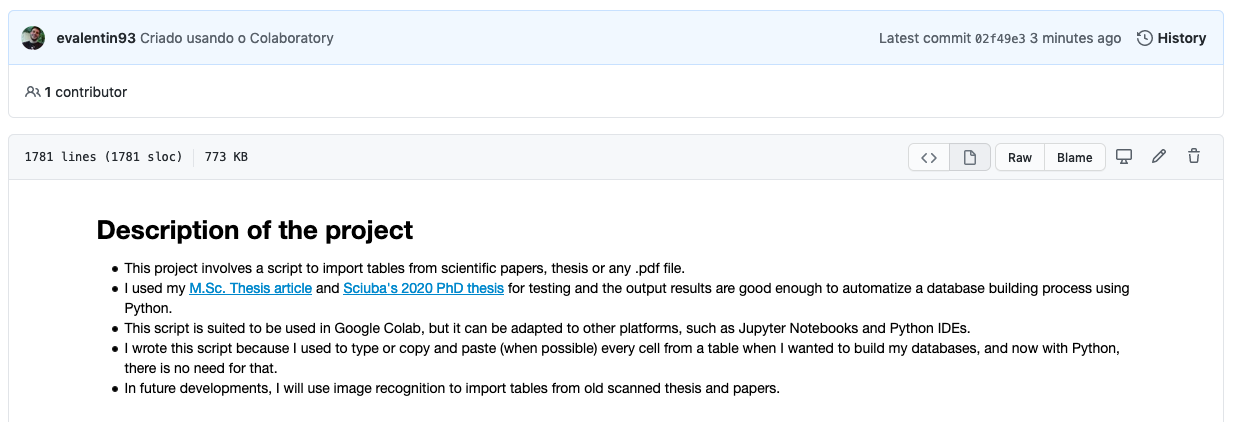

*   When you open the link, a Google Colab tab in your browser will appear, click on *File > Save a copy on Drive*. A new browser tab will open. This new tab will be your copy of my notebook. **Please, only edit this copy; you can save it, change it and keep it**.

*   Notebook environments in Python allow you to use code cells and text cells. In this way, it is easier and prettier to explain your code. Code cells are indicated by brackets **[   ]**, code comments and instructions are contained inside the code cells and are noted by **#**.

*   It is important to feed Google Colab with the articles or thesis you want to extract the information. To do this, click on the folder in the bar on the left, drag the files into the white space and drop them. These files will be uploaded in a temporary virtual machine, if you stay offline for too long, the machine will disconnect, and you will have to do this process again.

*   To run the code, you will have to follow the order of the cell codes from top to bottom because you need to install a series of packages and libraries. This initial installing setup is indicated in the code in the next section. Just run each cell by clicking on them and pressing *Shift + Enter* or pressing the "play" button on its left. It is important to finalize the processing time of one cell before moving to the next one.

*   After installing all the required packages, follow the instructions contained in the comments of the code cells.

## Source code

### This is the setup section, install everything and follow the code cell's order

This code is dependent on Camelot, a table recognizing library on Python. It is essential to install it correctly.

Documentation for Camelot: https://buildmedia.readthedocs.org/media/pdf/camelot-py/latest/camelot-py.pdf

In [ ]:
# Install ghostscript (needed to run Camelot)

! apt install python3-tk ghostscript

In [2]:
# Import tkinter (needed to run Camelot)

import tkinter

In [3]:
# Check if ghostscript is installed correctly, if not, contact me at 
# eduardo.valentin-dos-santos.1@ulaval.ca

!gs -version

GPL Ghostscript 9.26 (2018-11-20)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.


In [ ]:
# Install Camelot through pip

!pip install camelot-py[cv]

In [5]:
# Import Camelot

import camelot

### This is the source code, follow the comments to adapt for your case

#### Example 1: An article (Lithos)

* I used my [M.Sc. Thesis article](https://www.sciencedirect.com/science/article/abs/pii/S0024493720301900) for testing.

* The .csv files generated from this code are all in the Github folder containing this notebook, but I will share some sample output images at the end of this example.

In [6]:
# The path of the file you want to scan. You can discover the path of a file in Google Colab
# by clicking on the folder in the left sidebar and right-clicking in your .pdf file, then
# selecting "Copy path". Once you have the path, paste it in the variable file_path, but 
# between quotes.

file_path = '/content/Valentin_etal_2020.pdf'

In [7]:
# This function reads the pdf looking for tables; flavor='lattice' is better suited for tables 
# with great spacing between rows and columns. It doesn't work in many cases, but it is worth
# trying. The pages notation can be used to specify the .pdf page you want to scan; I chose in
# this example "1-end" to scan the entire document.

tables = camelot.read_pdf(file_path, pages = "1-end", flavor='lattice')

In [8]:
# I'm calling the previously created tables variable to show how many tables the read_pdf function 
# recognized. It recognized eleven tables.

tables

<TableList n=11>

In [9]:
# I've created a loop to show me precisely what tables are contained in the tables variable. Python 
# starts counting from 0 to the specified number. Since our last function recognized eleven table 
# objects, I have to loop until the 10th element. As I said earlier, the flavor='lattice' doesn't 
# work in many cases, so this loop's output is nonsense.

for i in range(10):
  print(tables[i].df)

  0 1
0    
1    
  0 1 2
0      
1      
2      
  0 1
0    
1    
  0 1 2
0      
1      
  0 1 2
0      
1      
  0 1 2
0      
1      
  0 1 2
0      
1      
  0 1 2
0      
1      
  0 1 2
0      
1      
  0
0  


In [10]:
# Since the last attempt wasn't successful, I will call the read_pdf function again, but with 
# flavor='stream', another option available from Camelot's documentation. This mode recognizes more 
# things like a table object, but its accuracy is a lot worse, so additional work must be done to 
# filter and organize the final output. The result of this function is assigned to the tables2
# variable.

tables2 = camelot.read_pdf(file_path, pages='1-end', flavor='stream')

In [11]:
# I'm calling the previously created tables2 variable to show how many tables the read_pdf function 
# recognized. It recognized twenty-four tables.

tables2

<TableList n=25>

In [12]:
# I've created a loop to show me precisely what tables are contained in the tables variable. Python 
# starts counting from 0 to the specified number. Since our last function recognized twenty-four 
# table objects, I have to loop until the 23th element. In this case, the function recognized too 
# many things. The article's columns were recognized as tables, so I will use a logic condition to 
# filter what is text and tables in the next cell.

for i in range (23):
  print(tables2[i].df)

                                                    0                                                  1
0                                                      j o u r n a l h o m e p a g e : w w w . e l s ...
1                                    Research Article                                                   
2   Monte Santo suite, an example of Ediacaran-Cam...                                                   
3   rocks in the Araguaia Belt, Central Brazil. Im...                                                   
4                                  Gondwana evolution                                                   
5   Eduardo Valentin ⁎, Nilson F. Botelho, Elton L...                                                   
6   Instituto de Geociências, Universidade de Bras...                                                   
7                              a r t i c l e\ni n f o                                    a b s t r a c t
8                                    Article history:  

In [13]:
# tables_output is an empty list that will keep the actual tables that will be filtered

tables_output = []

# This time, my loop will iterate over all the table objects recognized by the read_pdf function. 
# All of which are kept in the tables2 variable. The term tables in tables2 is a generic term that 
# only exists inside the loop structure, it is a local variable.

for tables in tables2:
  
  # The first important thing to understand in this section of the code is the concept and notation 
  # of the table object. This object is a dataframe. A dataframe is similar to an Excel spreadsheet; 
  # it contains rows and columns. To navigate through these rows and columns, we use numbers. Since 
  # the local variable tables will take the value of each of the twenty-four table objects at each 
  # iteration, I will use the [column][row] notation to filter out what is an actual table.
  
  # Therefore I'm creating a logical condition based on the analysis of the table objects in tables2. 
  # Since this is a scientific paper, tables will have a legend (subtitle, I don't know), so my condition 
  # states that if the word 'Table' is contained in the first [0] or second [1] rows of the first [0] 
  # column (therefore, tables.df[0][0] or [0][1]) and if the table has more than three columns 
  # (tables.shape[1] > 2), they will be shown on the screen and added to the tables_output list. I chose 
  # tables.shape[1] because the .shape function returns a tuple containing the numbers of rows and columns, 
  # respectively (rows, columns), of each table; therefore, I'm referring to [1] because I'm only 
  # interested in the number of columns.   

  # Again, these parameters were all set considering my specific case. If you want to use this code in
  # your particular cases, the crucial part is understanding the difference between an actual table and 
  # gibberish in the last code cell. In this way, you can build your own filters and logical conditions 
  # based on mine or even expand them if you like.
  
  if ('Table' in tables.df[0][0] or 'Table' in tables.df[0][1]) and tables.shape[1] > 2:
    print(tables.df[0][0:3])
    print('')
    tables_output.append(tables)

0                                              Table 1
1    Whole-rock major element analyses of the Monte...
2         eline syenite, AFS- Alkali feldspar syenite.
Name: 0, dtype: object

0                                              Table 2
1    Whole-rock trace element analyses of the Monte...
2                                            Rock Type
Name: 0, dtype: object

0                     12
1    Table 2 (continued)
2              Rock Type
Name: 0, dtype: object

0                                              Table 3
1                                                     
2    respectively (Jacobsen and Wasserburg, 1980, 1...
Name: 0, dtype: object



In [14]:
# This is the last part, where I iterated over the tables_output list to save each article's filtered 
# table as a .csv file. Supported formats are: .xlsx (to_excel), .html (to_html), .json (to_json) and 
# .db (to_sqlite). As you could see in the previous step, Table 2 was segmented into two different 
# pages in my article, and therefore, recognized as two different tables. The next text cells show 
# images of the .csv output. It is certainly not perfect, but it can be easily rearranged and organized 
# using the Pandas library in Python or any other programming language or simply copying and pasting 
# in Excel :). The output .csv file will be in the left sidebar, together with the uploaded .pdf files.

for tables in tables_output:
  tables.to_csv(f"Valentin_etal_2020-Table{tables_output.index(tables)+1}.csv")

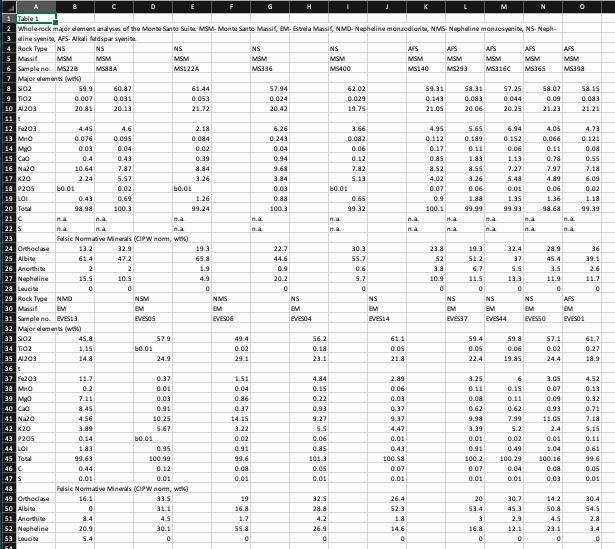

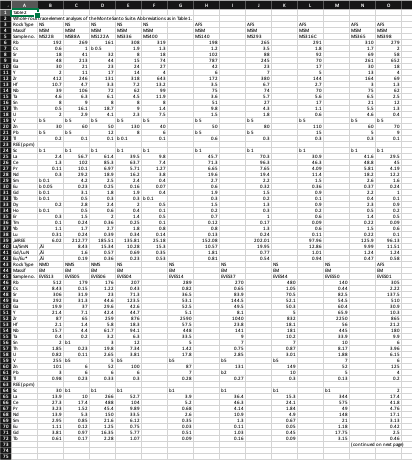

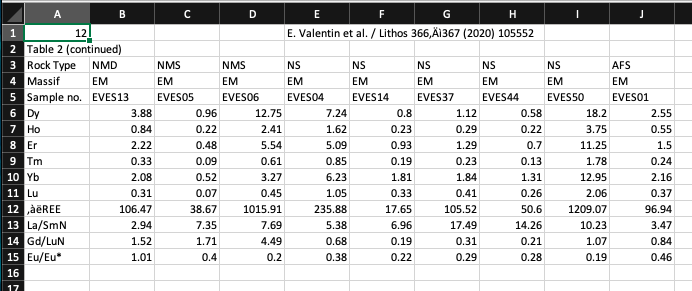

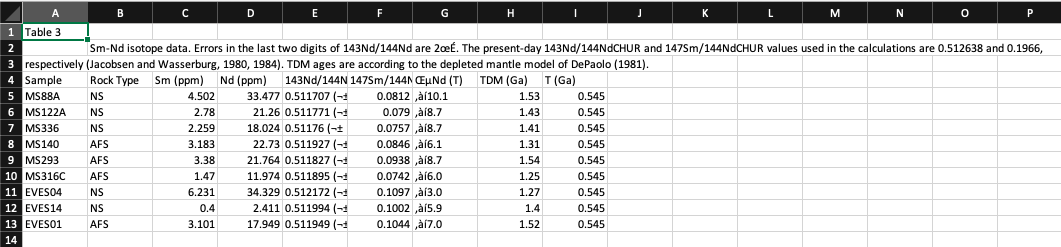

#### Example 2: A thesis

* I used [Sciuba's 2020 PhD thesis](https://corpus.ulaval.ca/jspui/browse?type=author&order=ASC&rpp=20&authority=24f39a93-12d1-414c-847b-74b0ab5a0f2e) for testing.

* I will focus on Sciuba's tourmaline database. Since it is a large database, I will not upload the .csv files on Github, but I will show you some example images.

* This section will have less comments, since the logic of this code was explained before.


In [15]:
file_path2 = '/content/Sciuba_2020_PhD_Thesis_ULaval.pdf'

In [16]:
tables3 = camelot.read_pdf(file_path2, pages = "187-271", flavor='lattice')

In [17]:
tables3

<TableList n=0>

In [18]:
tables4 = camelot.read_pdf(file_path2, pages = "187-271", flavor='stream')

In [19]:
tables4

<TableList n=125>

In [20]:
# I chose only the first five iterations because the database is too large.

for i in range(5):
  print(tables4[i].df)

                                                   0   ...        10
0   Appendix C-3. EPMA elements composition in tou...  ...          
1                                            LOCALITY  ...  SiO2_pct
2                                           Hollinger  ...     36.80
3                                           Hollinger  ...     36.58
4                                           Hollinger  ...     36.90
5                                                Dome  ...     36.74
6                                                Dome  ...     36.27
7                                                Dome  ...     36.67
8                                                Dome  ...     36.46
9                                                Dome  ...     36.36
10                                               Dome  ...     35.92
11                                               Dome  ...     36.92
12                                               Dome  ...     36.32
13                                

In [21]:
# By choosing tables4[-i], I can see the last 5 elements of tables4, but in reverse order,
# so the first to appear on the screen is actually the last element.

for i in range(1, 5):
  print(tables4[(-i)].df)

                    0          1         2
0          ANALYSE_ID  Th232_ppm  U238_ppm
1   LRTO-04-L3-18.775       0.01      0.01
2   LRTO-04-L3-14.764       0.00      0.03
3   LRTO-04-L4-42.736       0.00      0.07
4   LRTO-04-L4-12.121       0.00      0.00
5   LRTO-04-L5-20.386       0.01      0.01
6   LRTO-04-L6-26.773       0.06      0.29
7   LRTO-04-L6-25.985       0.01      0.05
8   LRTO-04-L7-17.455       0.01      0.00
9   LRTO-04-L7-22.311       0.00      0.01
10  LRTO-04-L8-47.115       0.00      0.00
11  LRTO-04-L9-59.255       0.02      0.16
                     0          1         2
0           ANALYSE_ID  Th232_ppm  U238_ppm
1    NEVA-01-L4-27.913       0.37      0.02
2    NEVA-01-L4-10.492       0.05      0.01
3    NEVA-01-L5-7.9105       0.47      0.08
4    NEVA-01-L5-19.984       0.96      0.23
5    NEVA-01-L5-10.955       1.05      0.20
6    NEVA-01-L6-19.339       0.09      0.02
7    NEVA-01-L7-11.741       0.24      0.04
8    NEVA-01-L7-10.003       0.08      0.02
9

In [22]:
# Both previous loops are to check if the selected pages in the read_pdf function are accurate. 
# The tables4 variable is precisely what I wanted to extract from the pdf file, so we can already 
# jump to the last step on the first example.

tables_output2 = []

for tables in tables4:
    tables_output2.append(tables)

for tables in tables_output2:
  tables.to_csv(f"Sciuba_2020-Table{tables_output2.index(tables)+1}.csv")

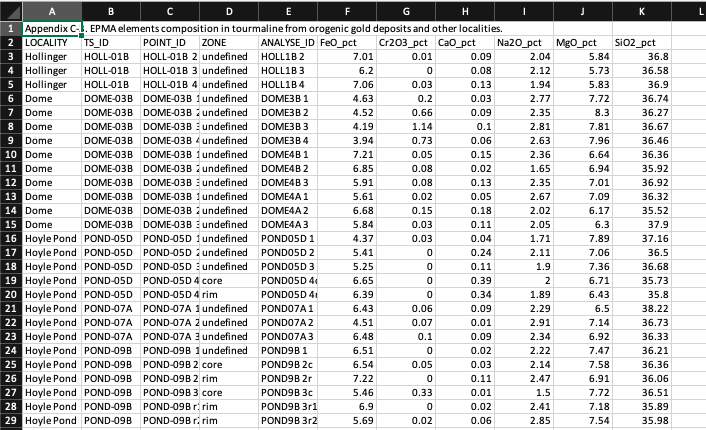

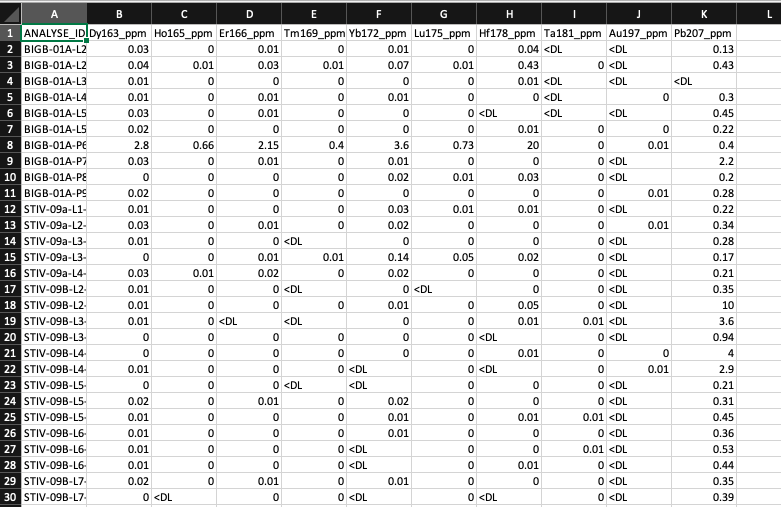



*   The tables are segmented, but they can be easily joined together using Pandas in Python.
*   Hope you find this code useful. If you have any questions, please don't hesitate to contact me at: eduardo.valentin-dos-santos.1@ulaval.ca



